# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import datetime

# Import API key
from api_keys import api_key
from pprint import pprint

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_stats = {}

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_stats[city] = {"Lat":lat_lng[0], "Long":lat_lng[1]}

# Print the city count to confirm sufficient count
len(cities)

612

In [3]:
#Print cities with coordinates
pprint(city_stats)

{'abu dhabi': {'Lat': 21.259823710945483, 'Long': 53.132564203592835},
 'adaufe': {'Lat': 41.59504410934849, 'Long': -8.395476605795949},
 'aden': {'Lat': 12.189945355237725, 'Long': 45.07374472699044},
 'adrar': {'Lat': 28.89302391766195, 'Long': -1.8385517015174457},
 'aflu': {'Lat': 34.053742952242814, 'Long': 0.7303033432764323},
 'agadir': {'Lat': 30.010245926211653, 'Long': -9.404575527877967},
 'agra': {'Lat': 27.141136624893107, 'Long': 78.09229906313345},
 'ahipara': {'Lat': -30.591025576934, 'Long': 168.18970340751338},
 'ahmadnagar': {'Lat': 19.099816666172913, 'Long': 74.72793218039149},
 'ahuimanu': {'Lat': 38.22141253766128, 'Long': -151.5281091358945},
 'ahumada': {'Lat': 30.78105161968992, 'Long': -106.02700065306145},
 'airai': {'Lat': 5.619502039528172, 'Long': 139.19424879669384},
 'aitape': {'Lat': -1.837578978247251, 'Long': 143.05774605653642},
 'aklavik': {'Lat': 67.23877493227357, 'Long': -138.57658770094392},
 'aksha': {'Lat': 50.25468816564589, 'Long': 112.500

In [27]:
#construct API query code
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

#build partial query URL
query_url = (f"{url}appid={api_key}&units={units}&q=")

#test url and show sample to find location of desired data
response = requests.get(query_url + "Nashville").json()
pprint(response)

#store date
date = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d')

{'base': 'stations',
 'clouds': {'all': 1},
 'cod': 200,
 'coord': {'lat': 36.16, 'lon': -86.77},
 'dt': 1569087981,
 'id': 4644585,
 'main': {'humidity': 33,
          'pressure': 1024,
          'temp': 30.43,
          'temp_max': 31.67,
          'temp_min': 29},
 'name': 'Nashville',
 'sys': {'country': 'US',
         'id': 4609,
         'message': 0.0087,
         'sunrise': 1569065642,
         'sunset': 1569109590,
         'type': 1},
 'timezone': -18000,
 'visibility': 16093,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 190, 'speed': 3.6}}


In [21]:
#Get temperature, humidity, cloudiness, and wind speed for each city from API
set_num = 1
city_num = 0
oops = []
for city in city_stats:
    ###dear API, please give me what I want
    response = requests.get(query_url + city).json()
    city_num += 1
    try:
    #update city_stats (overwriting current coords) with retrieved stats
        city_stats[city]["Temperature"] = response["main"]["temp_max"]
        city_stats[city]["Humidity"] = response["main"]["humidity"]
        city_stats[city]["Cloudiness"] = response["clouds"]["all"]
        city_stats[city]["Wind speed"] = response["wind"]["speed"]
        city_stats[city]["Date"] = datetime.utcfromtimestamp(response["dt"]).strftime('%Y-%m-%d')
        city_stats[city]["Country"] = response["sys"]["country"]
        print(f"Processing city {city_num} of set {set_num}: {city}")
    except KeyError:
        print(f'"{city}" not found.  Removing from list...')
        oops.append(city)
    if "coord" in response:
        city_stats[city]["Lat"] = response["coord"]["lat"]
        city_stats[city]["Long"] = response["coord"]["lon"]
    if city_num >= 50:
        set_num += 1
        city_num = 0
        time.sleep(1)
for city in oops:
    del city_stats[city]

print("---------------------------------------------")
print(f"Cities successfully added: {len(city_stats)}")
print(f"Cities omitted: {len(oops)}")
###Some cities in API are missing coordinate information
###Store latitude/longitude coordinates when initially creating list of cities
###Update with more precise info from API ***if available***

Processing city 1 of set 1: tasiilaq
Processing city 2 of set 1: saskylakh
Processing city 3 of set 1: cape town
Processing city 4 of set 1: tiksi
Processing city 5 of set 1: luderitz
Processing city 6 of set 1: chokurdakh
Processing city 7 of set 1: kjollefjord
Processing city 8 of set 1: inhambane
Processing city 9 of set 1: kamiiso
Processing city 10 of set 1: yellowknife
Processing city 11 of set 1: dingle
Processing city 12 of set 1: kapaa
Processing city 13 of set 1: punta arenas
Processing city 14 of set 1: busselton
Processing city 15 of set 1: hasaki
Processing city 16 of set 1: albany
Processing city 17 of set 1: mataura
Processing city 18 of set 1: touros
Processing city 19 of set 1: joshimath
Processing city 20 of set 1: hobart
Processing city 21 of set 1: isangel
Processing city 22 of set 1: bodri
Processing city 23 of set 1: iqaluit
Processing city 24 of set 1: ushuaia
Processing city 25 of set 1: waddan
Processing city 26 of set 1: dwarka
Processing city 27 of set 1: pue

Processing city 19 of set 5: mega
Processing city 20 of set 5: karratha
Processing city 21 of set 5: fort nelson
Processing city 22 of set 5: sao gabriel da cachoeira
Processing city 23 of set 5: manado
Processing city 24 of set 5: kaitangata
Processing city 25 of set 5: khatanga
Processing city 26 of set 5: victoria
Processing city 27 of set 5: brest
Processing city 28 of set 5: bisauli
Processing city 29 of set 5: aksha
Processing city 30 of set 5: zhuhai
Processing city 31 of set 5: ceres
Processing city 32 of set 5: barreirinhas
Processing city 33 of set 5: nebbi
Processing city 34 of set 5: vao
Processing city 35 of set 5: bambous virieux
Processing city 36 of set 5: lagunas
Processing city 37 of set 5: vila
Processing city 38 of set 5: olinda
Processing city 39 of set 5: lincoln
Processing city 40 of set 5: hobyo
Processing city 41 of set 5: cabo san lucas
Processing city 42 of set 5: muros
Processing city 43 of set 5: dali
Processing city 44 of set 5: sausar
Processing city 45 o

Processing city 34 of set 9: otradnoye
Processing city 35 of set 9: pathein
Processing city 36 of set 9: mayskiy
Processing city 37 of set 9: oktyabrskiy
Processing city 38 of set 9: los llanos de aridane
Processing city 39 of set 9: dinkelsbuhl
Processing city 40 of set 9: sri aman
Processing city 41 of set 9: gao
Processing city 42 of set 9: ivrea
Processing city 43 of set 9: shatrovo
Processing city 44 of set 9: ust-kuyga
Processing city 45 of set 9: snina
Processing city 46 of set 9: axim
Processing city 47 of set 9: khorramshahr
Processing city 48 of set 9: westlock
Processing city 49 of set 9: petrykivka
Processing city 50 of set 9: cordenons
Processing city 1 of set 10: general pico
Processing city 2 of set 10: pangody
Processing city 3 of set 10: sovetskiy
Processing city 4 of set 10: chisec
Processing city 5 of set 10: san cristobal
Processing city 6 of set 10: macklin
Processing city 7 of set 10: sal rei
Processing city 8 of set 10: mincivan
Processing city 9 of set 10: ordzh

In [22]:
pprint(city_stats)

{'abu dhabi': {'Cloudiness': 0,
               'Country': 'AE',
               'Date': '2019-09-21',
               'Humidity': 75,
               'Lat': 24.47,
               'Long': 54.37,
               'Temperature': 33,
               'Wind speed': 2.6},
 'adaufe': {'Cloudiness': 75,
            'Country': 'PT',
            'Date': '2019-09-21',
            'Humidity': 93,
            'Lat': 40.89,
            'Long': -8.24,
            'Temperature': 18.89,
            'Wind speed': 1.5},
 'aden': {'Cloudiness': 9,
          'Country': 'YE',
          'Date': '2019-09-21',
          'Humidity': 49,
          'Lat': 12.79,
          'Long': 45.03,
          'Temperature': 32.7,
          'Wind speed': 3.17},
 'adrar': {'Cloudiness': 65,
           'Country': 'DZ',
           'Date': '2019-09-21',
           'Humidity': 10,
           'Lat': 27.87,
           'Long': -0.29,
           'Temperature': 42,
           'Wind speed': 4.1},
 'agadir': {'Cloudiness': 0,
            'Countr

              'Country': 'RU',
              'Date': '2019-09-21',
              'Humidity': 94,
              'Lat': 68.75,
              'Long': 161.3,
              'Temperature': -2.61,
              'Wind speed': 3.24},
 'chisec': {'Cloudiness': 23,
            'Country': 'GT',
            'Date': '2019-09-21',
            'Humidity': 55,
            'Lat': 15.81,
            'Long': -90.29,
            'Temperature': 31.3,
            'Wind speed': 1.64},
 'chokurdakh': {'Cloudiness': 51,
                'Country': 'RU',
                'Date': '2019-09-21',
                'Humidity': 87,
                'Lat': 70.62,
                'Long': 147.9,
                'Temperature': -4.01,
                'Wind speed': 2.1},
 'chunskiy': {'Cloudiness': 75,
              'Country': 'RU',
              'Date': '2019-09-21',
              'Humidity': 89,
              'Lat': 56.08,
              'Long': 99.63,
              'Temperature': 6.9,
              'Wind speed': 1.62},
 'chuy'

 'half moon bay': {'Cloudiness': 1,
                   'Country': 'US',
                   'Date': '2019-09-21',
                   'Humidity': 60,
                   'Lat': 37.46,
                   'Long': -122.43,
                   'Temperature': 26.67,
                   'Wind speed': 3.12},
 'halifax': {'Cloudiness': 20,
             'Country': 'CA',
             'Date': '2019-09-21',
             'Humidity': 42,
             'Lat': 44.65,
             'Long': -63.58,
             'Temperature': 22.22,
             'Wind speed': 9.8},
 'hambantota': {'Cloudiness': 66,
                'Country': 'LK',
                'Date': '2019-09-21',
                'Humidity': 81,
                'Lat': 6.12,
                'Long': 81.12,
                'Temperature': 27.7,
                'Wind speed': 6.03},
 'harper': {'Cloudiness': 40,
            'Country': 'US',
            'Date': '2019-09-21',
            'Humidity': 49,
            'Lat': 30.3,
            'Long': -99.24,
        

         'Country': 'IR',
         'Date': '2019-09-21',
         'Humidity': 17,
         'Lat': 27.66,
         'Long': 54.32,
         'Temperature': 33,
         'Wind speed': 3.1},
 'las tunas': {'Cloudiness': 40,
               'Country': 'CU',
               'Date': '2019-09-21',
               'Humidity': 66,
               'Lat': 20.96,
               'Long': -76.96,
               'Temperature': 32,
               'Wind speed': 3.6},
 'lasa': {'Cloudiness': 20,
          'Country': 'CY',
          'Date': '2019-09-21',
          'Humidity': 78,
          'Lat': 34.92,
          'Long': 32.53,
          'Temperature': 26,
          'Wind speed': 1.5},
 'lata': {'Cloudiness': 54,
          'Country': 'IN',
          'Date': '2019-09-21',
          'Humidity': 91,
          'Lat': 30.78,
          'Long': 78.62,
          'Temperature': 1.4,
          'Wind speed': 0.93},
 'lebu': {'Cloudiness': 100,
          'Country': 'ET',
          'Date': '2019-09-21',
          'Humidity'

               'Lat': 26.59,
               'Long': 101.72,
               'Temperature': 12.9,
               'Wind speed': 0.17},
 'pasni': {'Cloudiness': 0,
           'Country': 'PK',
           'Date': '2019-09-21',
           'Humidity': 70,
           'Lat': 25.26,
           'Long': 63.48,
           'Temperature': 27.2,
           'Wind speed': 3.06},
 'pathein': {'Cloudiness': 95,
             'Country': 'MM',
             'Date': '2019-09-21',
             'Humidity': 93,
             'Lat': 16.78,
             'Long': 94.73,
             'Temperature': 25.2,
             'Wind speed': 2.51},
 'pecos': {'Cloudiness': 1,
           'Country': 'US',
           'Date': '2019-09-21',
           'Humidity': 57,
           'Lat': 31.42,
           'Long': -103.49,
           'Temperature': 27,
           'Wind speed': 3.1},
 'peniche': {'Cloudiness': 75,
             'Country': 'PT',
             'Date': '2019-09-21',
             'Humidity': 100,
             'Lat': 39.36,
      

 'springbok': {'Cloudiness': 35,
               'Country': 'ZA',
               'Date': '2019-09-21',
               'Humidity': 78,
               'Lat': -29.67,
               'Long': 17.88,
               'Temperature': 13.6,
               'Wind speed': 7.99},
 'srandakan': {'Cloudiness': 90,
               'Country': 'ID',
               'Date': '2019-09-21',
               'Humidity': 86,
               'Lat': -7.94,
               'Long': 110.25,
               'Temperature': 23.1,
               'Wind speed': 3.92},
 'sri aman': {'Cloudiness': 100,
              'Country': 'MY',
              'Date': '2019-09-21',
              'Humidity': 94,
              'Lat': 1.24,
              'Long': 111.46,
              'Temperature': 25,
              'Wind speed': 0.91},
 'sroda wielkopolska': {'Cloudiness': 0,
                        'Country': 'PL',
                        'Date': '2019-09-21',
                        'Humidity': 63,
                        'Lat': 52.23,
         

In [23]:
cities_df = pd.DataFrame.from_dict(city_stats).transpose()
cities_df.head()

Cloudiness Country        Date Humidity    Lat    Long Temperature  \
tasiilaq          90      GL  2019-09-21       70  65.61  -37.64           6   
saskylakh        100      RU  2019-09-21       95  71.97  114.09         4.2   
cape town         75      ZA  2019-09-21       82 -33.93   18.42       15.56   
tiksi            100      RU  2019-09-21       89  71.64  128.87         2.2   
luderitz         100      NA  2019-09-21       59 -26.65   15.16          18   

          Wind speed  
tasiilaq         6.2  
saskylakh       5.98  
cape town        4.6  
tiksi           3.16  
luderitz         9.3

In [24]:
cities_df.to_csv("City Weather Data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

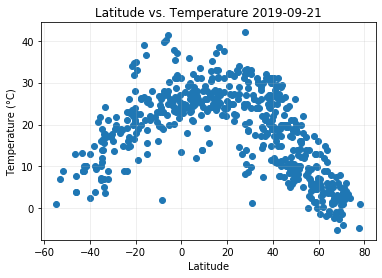

In [28]:
plt.scatter(cities_df["Lat"], cities_df["Temperature"])
plt.grid(alpha=.25)
plt.title(f"Latitude vs. Temperature {date}")
plt.ylabel("Temperature (°C)")
plt.xlabel("Latitude")
plt.savefig("Lat_Temp.png")

#### Latitude vs. Humidity Plot

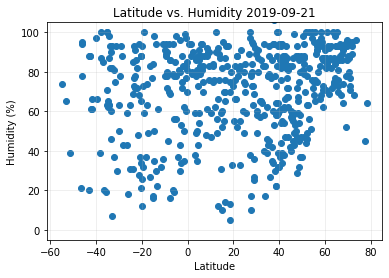

In [29]:
plt.scatter(cities_df["Lat"], cities_df["Humidity"])
plt.grid(alpha=.25)
plt.title(f"Latitude vs. Humidity {date}")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.ylim(top=105, bottom=-5)
plt.savefig("Lat_Hum.png")

#### Latitude vs. Cloudiness Plot

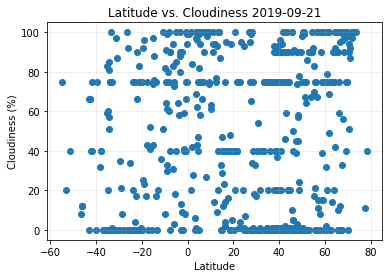

In [30]:
plt.scatter(cities_df["Lat"], cities_df["Cloudiness"])
plt.grid(alpha=.25)
plt.title(f"Latitude vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.ylim(top=105, bottom=-5)
plt.savefig("Lat_Cloud.png")

#### Latitude vs. Wind Speed Plot

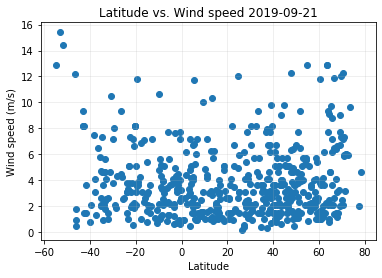

In [31]:
plt.scatter(cities_df["Lat"], cities_df["Wind speed"])
plt.grid(alpha=.25)
plt.title(f"Latitude vs. Wind speed {date}")
plt.ylabel("Wind speed (m/s)")
plt.xlabel("Latitude")
plt.savefig("Lat_Wind.png")

(-11.30985663082437, 105)

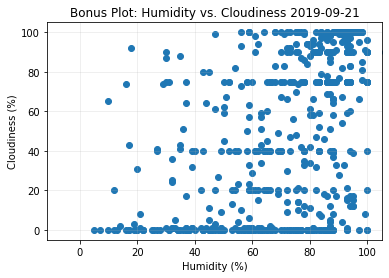

In [32]:
plt.scatter(cities_df["Humidity"], cities_df["Cloudiness"])
plt.grid(alpha=.25)
plt.title(f"Bonus Plot: Humidity vs. Cloudiness {date}")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Humidity (%)")
plt.xlim(right=105)
#plt.savefig("Lat_Wind.png")